In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define a set of colors for later visualizations
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

In [2]:
# This function is written by Bauckhage C. Numpy/scipy Recipes for Data Science: k-Medoids Clustering[R]. 
# Technical Report, University of Bonn, 2015.

import numpy as np
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

In [3]:

# plot dendrogram

# Authors: Mathew Kallada; revised by Yingjie Hu
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, color_the_tree = True, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    if color_the_tree:
        dendrogram(linkage_matrix, color_threshold=(len(model.labels_)-model.n_clusters), **kwargs)
    else:
        dendrogram(linkage_matrix, color_threshold=-1, **kwargs)

In [4]:
def plot_dbscan_result(model, X):  
    y_label = model.fit_predict(X)
    unique_label = set(y_label)
    n_cluster = len(unique_label)
    if -1 in unique_label:
        n_cluster = n_cluster - 1
    for cluster_i in range(n_cluster):
        plt.scatter(X[:,0][y_label== cluster_i],X[:,1][y_label== cluster_i], c=colors[cluster_i])

    # finally plot outlier
    plt.scatter(X[:,0][y_label== -1],X[:,1][y_label== -1], c="k")

In [5]:
from sklearn.datasets import make_blobs

In [6]:
X, y = make_blobs(centers=3, random_state=42)

In [8]:
X.head()

AttributeError: ignored

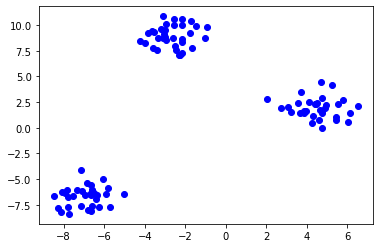

In [ ]:
plt.plot(X[:,0], X[:,1], "bo")

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmean_model = KMeans(n_clusters=3, random_state=42)

In [ ]:
y_label = kmean_model.fit_predict(X)
#do not compare directly because unsupervised learning

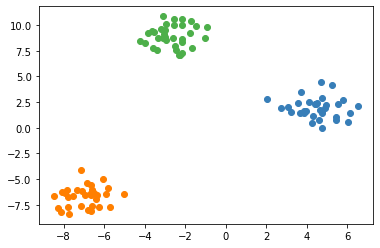

In [ ]:
for cluster_i in range(0,kmean_model.n_clusters):
  plt.plot(X[:,0][y_label==cluster_i], X[:,1][y_label==cluster_i], "o", c = colors[cluster_i])

In [ ]:
def plot_clustering_result (model, X):
  y_label = kmean_model.fit_predict(X)
  for cluster_i in range(0,kmean_model.n_clusters):
    plt.plot(x[:,0][y_label==cluster_i], x[:,1][y_label==cluster_i], "o", c = colors[cluster_i])

In [ ]:
#makes visualization easier
plot_clustering_result(kmean_model, X)

In [ ]:
kmean_model2 = KMeans(n_clusters=2, random_state=42)
plot_clustering_result(kmean_model2, X)

In [ ]:
kmean_model5 = KMeans(n_clusters=5, random_state=42)
plot_clustering_result(kmean_model2, X)

In [ ]:
X_outlier = np.append(X, [[-20,0],[100,0], [10,50], [80,-40], [40,10]], axis=0)

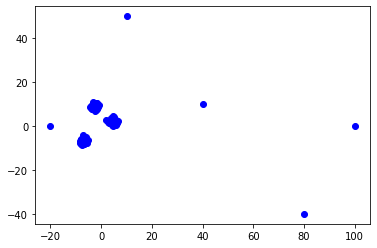

In [ ]:
plt.plot(X_outlier[:,0], X_outlier[:,1], "bo")

In [ ]:
plot_clustering_result(kmean_model, X_outlier)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
D = pairwise_distances(X_outlier)

In [ ]:
M, C = kMedoids(D, 3)

In [ ]:
M

array([87, 55, 77])

In [ ]:
C

{0: array([  1,   2,   3,   5,   6,   7,   8,   9,  10,  13,  14,  17,  20,
         23,  24,  25,  26,  31,  32,  34,  35,  36,  37,  38,  39,  41,
         42,  43,  44,  45,  49,  50,  51,  52,  56,  57,  58,  59,  61,
         63,  66,  68,  69,  70,  73,  74,  76,  78,  79,  80,  81,  82,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  99, 101, 102, 103, 104]),
 1: array([  4,  11,  12,  15,  16,  18,  19,  21,  22,  28,  30,  46,  47,
         48,  53,  54,  55,  64,  71,  72,  75,  83,  98, 100]),
 2: array([ 0, 27, 29, 33, 40, 60, 62, 65, 67, 77])}

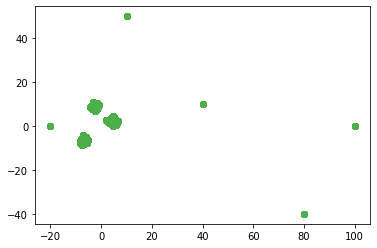

In [ ]:
for cluster_i in C:
  for point_idx in C[cluster_i]:
    plt.plot(X_outlier[:,0], X_outlier[:,1], "o", c = colors[cluster_i])

#noise (outliers) still included in the results

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=3)

In [ ]:
plot_clustering_result(agg_cluster, X)

In [ ]:
plot_dendrogram(agg_cluster)
#shows the clustering process

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan_model = DBSCAN(eps=2, min_samples=5)

In [ ]:
y_label = dbscan_model.fit_predict(X_outlier)

In [ ]:
y_label

array([ 0,  1,  2,  1,  0,  1,  2,  1,  1,  2,  2,  0,  0,  2,  2,  0,  0,
        2,  0,  0,  2,  0,  0,  2,  2,  2,  1,  0,  0,  0,  0,  1,  1,  0,
        2,  2,  2,  2,  1,  1,  0,  2,  1,  2,  2,  1,  0,  0,  0,  1,  1,
        1,  2,  0,  0,  0,  2,  2,  1,  2,  0,  1,  0,  1,  0,  0,  1,  0,
        1,  1,  1,  0,  0,  2,  1,  0,  1,  0,  1,  1,  2,  1,  2,  0,  2,
        2,  2,  1,  2,  1,  1,  1,  2,  1,  2,  2,  2,  1,  0,  2, -1, -1,
       -1, -1, -1])

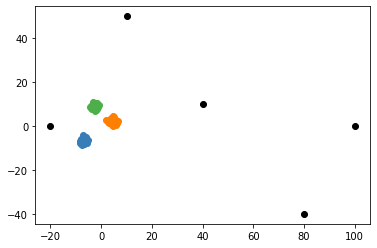

In [ ]:
plot_dbscan_result(dbscan_model, X_outlier)
#plt.xlim([-15, 15])
#plt.ylim([-15, 15])

In [ ]:
!pip install hdbscan
import hdbscan

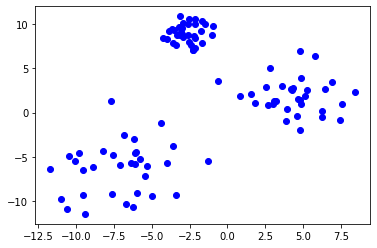

In [ ]:
X_varied, y_varied = make_blobs(centers=3, cluster_std=[1,2,3], random_state=42)
plt.plot(X_varied[:,0], X_varied[:,1],"bo")

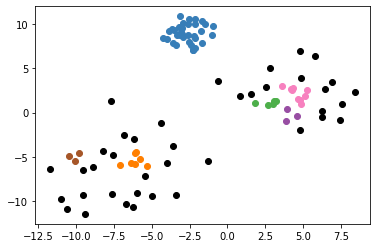

In [ ]:
dbscan_model = DBSCAN(eps=1, min_samples=3)
plot_dbscan_result(dbscan_model, X_varied)

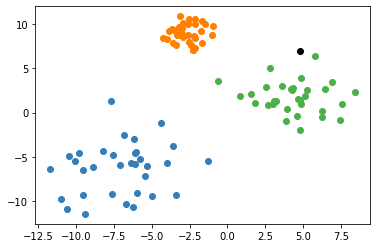

In [ ]:
#want to make each group from above a cluster
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)
plot_dbscan_result(hdbscan_model, X_varied)

In [ ]:
#silhouette score w/ kmeans
from sklearn.metrics import silhouette_score

In [ ]:
scores = []
for k in range(2, 10):
  kmeans_model = KMeans(n_clusters=k, random_state=42)
  y_label=kmeans_model.fit_predict(X)
  scores.append(silhouette_score(X, y_label))

Text(0, 0.5, 'Silhouette Score')

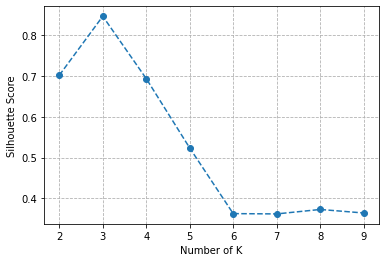

In [ ]:
plt.plot(range(2,10), scores, "o--")
plt.grid(linestyle="--")
plt.xlabel("Number of K")
plt.ylabel("Silhouette Score")